In [1]:
import re
from nltk.util import ngrams

In [2]:
s = "Camera quality is not bad as expected"
s2 = "Unlike the previous reviews, I feel the screen touch lock is not bad"

In [3]:
s = s.lower()
s = re.sub(r'[^a-zA-Z0-9\s]', '', s)
tokens = [token for token in s.split(" ") if token != ""]
output = list(ngrams(tokens, 2))

In [4]:
s2 = "Unlike the previous reviews, I feel the screen touch lock is not bad"
s2 = s2.lower()
s2= re.sub(r'[^a-zA-Z0-9\s]', '', s2)
tokens = [token for token in s2.split(" ") if token != ""]
output2 = list(ngrams(tokens, 2))

In [7]:
output

[('camera', 'quality'),
 ('quality', 'is'),
 ('is', 'not'),
 ('not', 'bad'),
 ('bad', 'as'),
 ('as', 'expected')]

In [8]:
output2

[('unlike', 'the'),
 ('the', 'previous'),
 ('previous', 'reviews'),
 ('reviews', 'i'),
 ('i', 'feel'),
 ('feel', 'the'),
 ('the', 'screen'),
 ('screen', 'touch'),
 ('touch', 'lock'),
 ('lock', 'is'),
 ('is', 'not'),
 ('not', 'bad')]

In [9]:
s2 = "The service is not bad and the food is also not bad"
s2 = s2.lower()
s2= re.sub(r'[^a-zA-Z0-9\s]', '', s2)
tokens = [token for token in s2.split(" ") if token != ""]
output2 = list(ngrams(tokens, 2))

In [10]:
output2
# not : 2 ; bad : 2
# not-bad : 2

[('the', 'service'),
 ('service', 'is'),
 ('is', 'not'),
 ('not', 'bad'),
 ('bad', 'and'),
 ('and', 'the'),
 ('the', 'food'),
 ('food', 'is'),
 ('is', 'also'),
 ('also', 'not'),
 ('not', 'bad')]

In [7]:
#imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# read data into a DataFrame
data = pd.read_csv("yelp.csv")

#make a copy of columns I need from raw data
df1 = data.iloc[:, [3,4,5,6,8]]
df1.head()

,stars,text,type,user_id,useful
0,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,5
1,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0
2,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,1
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,2
4,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0


In [14]:
df1["HelpfulnessNumerator"] = df1.useful
df1["HelpfulnessDenominator"] = df1.useful
del df1["useful"]

C:\Users\Jagathisan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jagathisan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
df1 = df1.rename(columns={"stars":"Score","text":"Text"})
df1.head()

,Score,Text,type,user_id,HelpfulnessNumerator,HelpfulnessDenominator
0,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,5,5
1,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0
2,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,1,1
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,2,2
4,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0


In [17]:
#include reviews that have more than 10 helpfulness data point only
df1 = df1[(df1.HelpfulnessDenominator > 10)]

In [18]:
df1['Score'].shape


(107,)

In [19]:
#check for missing values
df1.isnull().sum()

Score                     0
Text                      0
type                      0
user_id                   0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
dtype: int64

In [20]:
# convert text to lowercase
df1.loc[:, 'Text'] = df1['Text'].str.lower()
df1["Text"].head(10)

82     beer...or yoga?\n\nlocated in a small center j...
144    perhaps it was foolish for me to give la conde...
174    gils.. a relatively new business to the comple...
180    hippies scare me.     so in my preparation to ...
387    it's the middle of january and 75 degrees out....
531    lets just set the record straight here. zoe's ...
556    tandoori times\n\nvolume 1, issue 1, number 1....
562    okay i have found my new favorite "home office...
629    finalmente!!!\n\nandiamo....\n\nfood\n--------...
731    go go here for happy hour! from 4-7pm you can ...
Name: Text, dtype: object

In [21]:
#remove html tags
#import bleach
#df1["Text"] = df1['Text'].apply(lambda x: bleach.clean(x, tags=[], strip=True))
#df1["Text"].head(4)

In [22]:
#remove punctuation
import unicodedata
import sys

tbl = dict.fromkeys(i for i in range(sys.maxunicode)
                      if unicodedata.category(chr(i)).startswith('P'))
def remove_punctuation(text):
    return text.translate(tbl)

df1['Text']=df1['Text'].apply( lambda x: remove_punctuation(x))
df1["Text"].head(4)

82     beeror yoga\n\nlocated in a small center just ...
144    perhaps it was foolish for me to give la conde...
174    gils a relatively new business to the complex ...
180    hippies scare me     so in my preparation to g...
Name: Text, dtype: object

In [23]:
df1['Score'].shape


(107,)

In [43]:
df1.loc[:, 'HelpfulnessNumerator'] .describe()

count    107.000000
mean      15.392523
std        7.387850
min       11.000000
25%       12.000000
50%       14.000000
75%       16.000000
max       76.000000
Name: HelpfulnessNumerator, dtype: float64

In [44]:
#transform Helpfulness into a binary variable with 0.50 ratio
df1.loc[:, 'Helpful'] = np.where(df1.loc[:, 'HelpfulnessNumerator']  > 14, 1, 0)
df1.head(3)

,Score,Text,type,user_id,HelpfulnessNumerator,HelpfulnessDenominator,Helpful
82,5,beeror yoga\n\nlocated in a small center just ...,review,mfvezpz6ohS0NQk3DZdvqQ,16,16,1
144,5,perhaps it was foolish for me to give la conde...,review,dQO0tQISZyb9L4d5ASnXyQ,17,17,1
174,4,gils a relatively new business to the complex ...,review,C6IOtaaYdLIT5fWd7ZYIuA,19,19,1


In [45]:
df1.groupby('Helpful').count()

,Score,Text,type,user_id,HelpfulnessNumerator,HelpfulnessDenominator
Helpful,,,,,,
0,59,59,59,59,59,59
1,48,48,48,48,48,48


In [46]:
df1.corr()


,Score,HelpfulnessNumerator,HelpfulnessDenominator,Helpful
Score,1.000000,0.113292,0.113292,0.129882
HelpfulnessNumerator,0.113292,1.000000,1.000000,0.488505
HelpfulnessDenominator,0.113292,1.000000,1.000000,0.488505
Helpful,0.129882,0.488505,0.488505,1.000000


In [47]:
#make a copy
df2 = df1.copy(deep = True)

In [48]:
#tokenize text with Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.1, max_df=0.9,
                             ngram_range=(1, 4), 
                             stop_words='english')
vectorizer.fit(df2['Text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.1,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [49]:
X_train = vectorizer.transform(df2['Text'])
vocab = vectorizer.get_feature_names()

In [50]:
#find best logistic regression parameters
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression
feature_set = X_train
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.StratifiedKFold(df1.Helpful,n_folds=10),
    scoring='roc_auc'
)


gs.fit(X_train, df2.Helpful)
gs.grid_scores_

[mean: 0.50374, std: 0.22244, params: {'C': 100000, 'class_weight': None},
 mean: 0.51059, std: 0.22628, params: {'C': 100000, 'class_weight': 'balanced'},
 mean: 0.51059, std: 0.22628, params: {'C': 10000, 'class_weight': None},
 mean: 0.51059, std: 0.22628, params: {'C': 10000, 'class_weight': 'balanced'},
 mean: 0.51059, std: 0.22628, params: {'C': 1000, 'class_weight': None},
 mean: 0.51059, std: 0.22628, params: {'C': 1000, 'class_weight': 'balanced'},
 mean: 0.53333, std: 0.22490, params: {'C': 100, 'class_weight': None},
 mean: 0.52913, std: 0.22610, params: {'C': 100, 'class_weight': 'balanced'},
 mean: 0.56231, std: 0.23641, params: {'C': 10, 'class_weight': None},
 mean: 0.56231, std: 0.23641, params: {'C': 10, 'class_weight': 'balanced'},
 mean: 0.58520, std: 0.20863, params: {'C': 1, 'class_weight': None},
 mean: 0.57788, std: 0.20440, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.57695, std: 0.20881, params: {'C': 0.1, 'class_weight': None},
 mean: 0.55545, std: 0

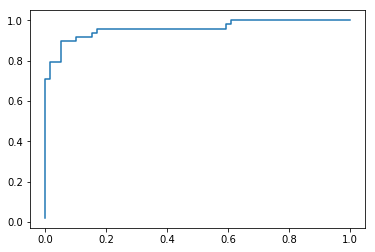

In [51]:
#plot ROC/AUC curve
from sklearn.metrics import roc_auc_score, roc_curve
actuals = gs.predict(feature_set) 
probas = gs.predict_proba(feature_set)
plt.plot(roc_curve(df2[['Helpful']], probas[:,1])[0], roc_curve(df2[['Helpful']], probas[:,1])[1])

In [53]:
# ROC/AUC score
y_score = probas
test2 = np.array(list(df2.Helpful))
test2 = test2.reshape(107,1)
y_true = test2
roc_auc_score(y_true, y_score[:,1].T)

0.9593926553672316

---

In [54]:
#Apply TfidfVectorizer to review text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

In [55]:
model = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1,random_state=5)

vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer.fit(df1['Text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=0.05,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [56]:
X_train = vectorizer.transform(df1['Text'])
vocab = vectorizer.get_feature_names()
sse_err = []
res = model.fit(X_train)
vocab = np.array(vocab)
cluster_centers = np.array(res.cluster_centers_)
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
words=list(words)

In [57]:
#top 10 words for each cluster
words

['bar',
 'ive',
 'really',
 'business',
 'make',
 'just',
 'like',
 'restaurant',
 'im',
 'better',
 'chicken',
 'time',
 'pizza',
 'free',
 'place',
 'salad',
 'people',
 'visit',
 'feel',
 'good',
 'coffee',
 'wine',
 'did',
 'food',
 'lot',
 'little',
 'great',
 'love']

In [58]:
#add top words to train set
train_set=X_train[:,[np.argwhere(vocab==i)[0][0] for i in words]]

In [59]:
# how many observations are in each cluster
df1['cluster'] = model.labels_
df1.groupby('cluster').count()

,Score,Text,type,user_id,HelpfulnessNumerator,HelpfulnessDenominator,Helpful
cluster,,,,,,,
0,26,26,26,26,26,26,26
1,30,30,30,30,30,30,30
2,16,16,16,16,16,16,16
3,35,35,35,35,35,35,35


In [60]:
# what does each cluster look like
df1.groupby('cluster').mean()

,Score,HelpfulnessNumerator,HelpfulnessDenominator,Helpful
cluster,,,,
0,4.038462,14.038462,14.038462,0.384615
1,3.733333,15.066667,15.066667,0.466667
2,4.250000,15.125000,15.125000,0.500000
3,4.228571,16.800000,16.800000,0.457143


In [61]:
# correlation matrix
df1.corr()

,Score,HelpfulnessNumerator,HelpfulnessDenominator,Helpful,cluster
Score,1.000000,0.113292,0.113292,0.129882,0.114544
HelpfulnessNumerator,0.113292,1.000000,1.000000,0.488505,0.139725
HelpfulnessDenominator,0.113292,1.000000,1.000000,0.488505,0.139725
Helpful,0.129882,0.488505,0.488505,1.000000,0.049218
cluster,0.114544,0.139725,0.139725,0.049218,1.000000
